<a href="https://colab.research.google.com/github/Claudia-Cabrera/data-management-for-business-analytics/blob/main/NFLArrests_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import kagglehub

In [ ]:
data_path = '/content/drive/MyDrive/Database Management /Group Project Dashboard/Data'
df = pd.read_csv(f'{data_path}/arrests.csv')
df.head()

In [ ]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import NFL arrest data
arrests_df = pd.read_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /arrests.csv')
arrests_df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [ ]:
#import city weather data
temp_df = pd.read_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /city_temperature.csv')
temp_df.head()

<ipython-input-18-eb339e391fd1>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


# Data Wrangling & Preperation

## NFL Arrests data
- need to explore data set
- change any variable types
- view missing data
- add in a column with the date (month, year)
- add in column with the location (city and state)

In [ ]:
# explore dataset
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          1006 non-null   int64  
 1   week_num        1006 non-null   int64  
 2   day_of_week     1006 non-null   object 
 3   gametime_local  1006 non-null   object 
 4   home_team       1006 non-null   object 
 5   away_team       1006 non-null   object 
 6   home_score      1006 non-null   int64  
 7   away_score      1006 non-null   int64  
 8   OT_flag         59 non-null     object 
 9   arrests         966 non-null    float64
 10  division_game   1006 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.6+ KB


In [ ]:
# change season to date year variable
arrests_df['season'] = pd.to_datetime(arrests_df['season'], format='%Y')
arrests_df['season'] = arrests_df['season'].dt.year
arrests_df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [ ]:
# missing data
arrests_df.isnull().sum()

,0
season,0
week_num,0
day_of_week,0
gametime_local,0
home_team,0
away_team,0
home_score,0
away_score,0
OT_flag,947
arrests,40


In [ ]:
# remove observations with missing values in arrests column
arrests_df = arrests_df.dropna(subset=['arrests'])

# drop OT_flag column since there are too many missing observations
arrests_df = arrests_df.drop(columns=['OT_flag'])

In [ ]:
# create month variable that = September for week_numbers 1,2,3,4
arrests_df['month'] = arrests_df['week_num'].apply(lambda x: 'September' if x in [1,2,3,4] else 'October' if x in [5,6,7,8] else 'November' if x in [9,10,11,12] else 'December')
arrests_df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December


In [ ]:
# create month_number variable
arrests_df['month_number'] = arrests_df['month'].apply(lambda x: 9 if x == 'September' else 10 if x == 'October' else 11 if x == 'November' else 12)
arrests_df


,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month,month_number
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September,9
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September,9
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October,10
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November,11
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,October,10
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,November,11
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,November,11
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,December,12


In [ ]:
# create date variable with season + month_number no day
arrests_df['date'] = pd.to_datetime(arrests_df['season'].astype(str) + '-' + arrests_df['month_number'].astype(str), format='%Y-%m').dt.strftime('%Y-%m')
arrests_df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month,month_number,date
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September,9,2011-09
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September,9,2011-09
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October,10,2011-10
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November,11,2011-11
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December,12,2011-12


In [ ]:
# print unique home_team values
print(arrests_df['home_team'].unique())

['Arizona' 'Baltimore' 'Carolina' 'Chicago' 'Cincinnati' 'Dallas' 'Denver'
 'Green Bay' 'Houston' 'Indianapolis' 'Jacksonville' 'Kansas City' 'Miami'
 'New England' 'New York Giants' 'New York Jets' 'Oakland' 'Philadelphia'
 'Pittsburgh' 'San Diego' 'San Francisco' 'Seattle' 'Tampa Bay'
 'Tennessee' 'Washington']


In [ ]:
# Create State Variable based on home team
arrests_df['State'] = arrests_df['home_team'].apply(lambda x: "Arizona" if x == "Arizona" else "Maryland" if x == "Baltimore" else "North Carolina" if x == "Carolina" else "Illinois" if x == "Chicago" else "Ohio" if x == "Cincinnati" else "Texas" if x in ["Dallas", "Houston"] else "Colorado" if x == "Denver" else "Wisconsin" if x == "Green Bay"
                                                    else "Indiana" if x == "Indianapolis" else "Florida" if x in ["Jacksonville", "Miami", "Tampa Bay"] else "Missouri" if x == "Kansas City" else
                                                    "Massachusetts" if x == "New England" else "New Jersey" if x in ["New York Giants", "New York Jets"] else "Nevada" if x == "Oakland"
                                                    else "Pennsylvania" if x in ["Philadelphia", "Pittsburgh"] else "California" if x in ['San Diego', "San Francisco" ] else "Washington" if x == "Seattle" else "Tennessee" if x == "Tennessee" else "District of Columbia")
arrests_df



,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month,month_number,date,State
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September,9,2011-09,Arizona
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September,9,2011-09,Arizona
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October,10,2011-10,Arizona
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November,11,2011-11,Arizona
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December,12,2011-12,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,October,10,2015-10,District of Columbia
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,November,11,2015-11,District of Columbia
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,November,11,2015-11,District of Columbia
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,December,12,2015-12,District of Columbia


In [ ]:
# create City Variable based on home team
arrests_df['City'] = arrests_df['home_team'].apply(lambda x: "Phoenix" if x == "Arizona"
                                                   else "Baltimore" if x == "Baltimore"
                                                   else "Charlotte" if x == "Carolina"
                                                   else "Chicago" if x == "Chicago"
                                                   else "Cincinnati" if x == "Cincinnati"
                                                   else "Dallas Ft Worth" if x == "Dallas"
                                                   else "Denver" if x == "Denver"
                                                   else "Green Bay" if x == "Green Bay"
                                                   else "Houston" if x == "Houston"
                                                   else "Indianapolis" if x == "Indianapolis"
                                                   else "Jacksonville" if x == "Jacksonville"
                                                   else "Kansas City" if x == "Kansas City"
                                                   else "Miami" if x == "Miami Beach"
                                                   else "Boston" if x == "New England"
                                                   else "Newark" if x in ["New York Giants", "New York Jets"]
                                                   else "Las Vegas" if x == "Oakland"
                                                   else "Philadelphia" if x == "Philadelphia"
                                                   else "Pittsburgh" if x == "Pittsburgh"
                                                   else "San Diego" if x == "San Diego"
                                                   else "San Francisco" if x == "San Francisco"
                                                   else "Seattle" if x == "Seattle"
                                                   else "Tampa St. Petersburg" if x == "Tampa Bay"
                                                   else "Nashville" if x == "Tennessee"
                                                   else "Washington DC")
arrests_df

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month,month_number,date,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September,9,2011-09,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September,9,2011-09,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October,10,2011-10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November,11,2011-11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December,12,2011-12,Arizona,Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,October,10,2015-10,District of Columbia,Washington DC
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,November,11,2015-11,District of Columbia,Washington DC
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,November,11,2015-11,District of Columbia,Washington DC
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,December,12,2015-12,District of Columbia,Washington DC


## City Temperature
- filter data to US and cities included in arrests data set
- missing values + cleaning
- create date variable by year and month
- find average temp for each month and year in those cities

In [ ]:
 # view temp_df
 temp_df.head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
5,Africa,Algeria,NaN,Algiers,1,6,1995,48.7
6,Africa,Algeria,NaN,Algiers,1,7,1995,48.9
7,Africa,Algeria,NaN,Algiers,1,8,1995,49.1
8,Africa,Algeria,NaN,Algiers,1,9,1995,49.0
9,Africa,Algeria,NaN,Algiers,1,10,1995,51.9


In [ ]:
# create city_temp_df with only US data
city_temp_df = temp_df[temp_df['Country'] == 'US']
print(city_temp_df.head())
city_temp_df.tail()

                Region Country    State        City  Month  Day  Year  \
1450990  North America      US  Alabama  Birmingham      1    1  1995   
1450991  North America      US  Alabama  Birmingham      1    2  1995   
1450992  North America      US  Alabama  Birmingham      1    3  1995   
1450993  North America      US  Alabama  Birmingham      1    4  1995   
1450994  North America      US  Alabama  Birmingham      1    5  1995   

         AvgTemperature  
1450990            50.7  
1450991            37.2  
1450992            33.2  
1450993            33.3  
1450994            26.4  


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [ ]:
# explore data
city_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455337 entries, 1450990 to 2906326
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1455337 non-null  object 
 1   Country         1455337 non-null  object 
 2   State           1455337 non-null  object 
 3   City            1455337 non-null  object 
 4   Month           1455337 non-null  int64  
 5   Day             1455337 non-null  int64  
 6   Year            1455337 non-null  int64  
 7   AvgTemperature  1455337 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 99.9+ MB


In [ ]:
# find years included
print(city_temp_df['Year'].unique())

# find cities included
city_temp_df['City'].unique()

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


array(['Birmingham', 'Huntsville', 'Mobile', 'Montgomery', 'Anchorage',
       'Fairbanks', 'Juneau', 'Flagstaff', 'Phoenix', 'Tucson', 'Yuma',
       'Fort Smith', 'Little Rock', 'Fresno', 'Los Angeles', 'Sacramento',
       'San Diego', 'San Francisco', 'Colorado Springs', 'Denver',
       'Grand Junction', 'Pueblo', 'Bridgeport', 'Hartford Springfield',
       'Wilmington', 'Washington', 'Washington DC', 'Daytona Beach',
       'Jacksonville', 'Miami Beach', 'Orlando', 'Tallahassee',
       'Tampa St. Petersburg', 'West Palm Beach', 'Atlanta', 'Columbus',
       'Macon', 'Savannah', 'Honolulu', 'Boise', 'Pocatello', 'Chicago',
       'Peoria', 'Rockford', 'Springfield', 'Evansville', 'Fort Wayne',
       'Indianapolis', 'South Bend', 'Des Moines', 'Sioux City',
       'Goodland', 'Topeka', 'Wichita', 'Lexington', 'Louisville',
       'Paducah', 'Baton Rouge', 'Lake Charles', 'New Orleans',
       'Shreveport', 'Caribou', 'Portland', 'Baltimore', 'Boston',
       'Detroit', 'Flint', 

In [ ]:
# find missing data
city_temp_df.isnull().sum()

,0
Region,0
Country,0
State,0
City,0
Month,0
Day,0
Year,0
AvgTemperature,0


In [ ]:
# remove Region, Country from city_temp_df
city_temp_df = city_temp_df.drop(columns=['Region', 'Country'])
city_temp_df

,State,City,Month,Day,Year,AvgTemperature
1450990,Alabama,Birmingham,1,1,1995,50.7
1450991,Alabama,Birmingham,1,2,1995,37.2
1450992,Alabama,Birmingham,1,3,1995,33.2
1450993,Alabama,Birmingham,1,4,1995,33.3
1450994,Alabama,Birmingham,1,5,1995,26.4
...,...,...,...,...,...,...
2906322,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [ ]:
# group by year and month and city
city_temp_df = city_temp_df.groupby(['Year', 'Month', 'City'])['AvgTemperature'].mean().reset_index()
city_temp_df


,Year,Month,City,AvgTemperature
0,1995,1,Abilene,45.503226
1,1995,1,Akron Canton,28.477419
2,1995,1,Albany,31.622581
3,1995,1,Albuquerque,38.309677
4,1995,1,Allentown,34.329032
...,...,...,...,...
46073,2020,5,Wichita,59.246154
46074,2020,5,Wichita Falls,70.292308
46075,2020,5,Wilkes Barre,49.884615
46076,2020,5,Yakima,58.784615


In [ ]:
# round avgtemp to 2 decimal places
city_temp_df['AvgTemperature'] = city_temp_df['AvgTemperature'].round(2)
city_temp_df

,Year,Month,City,AvgTemperature
0,1995,1,Abilene,45.50
1,1995,1,Akron Canton,28.48
2,1995,1,Albany,31.62
3,1995,1,Albuquerque,38.31
4,1995,1,Allentown,34.33
...,...,...,...,...
46073,2020,5,Wichita,59.25
46074,2020,5,Wichita Falls,70.29
46075,2020,5,Wilkes Barre,49.88
46076,2020,5,Yakima,58.78


## Join Data Frames

In [ ]:
arrests_df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,month,month_number,date,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,September,9,2011-09,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,September,9,2011-09,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,October,10,2011-10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,November,11,2011-11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,December,12,2011-12,Arizona,Phoenix


In [ ]:
city_temp_df.head()

,Year,Month,City,AvgTemperature
0,1995,1,Abilene,45.50
1,1995,1,Akron Canton,28.48
2,1995,1,Albany,31.62
3,1995,1,Albuquerque,38.31
4,1995,1,Allentown,34.33


In [ ]:
# rename arrests_df season to year, drop month, and change month_number to MOnth
arrests_df = arrests_df.rename(columns={'season': 'Year'})
arrests_df = arrests_df.drop(columns=['month'])
arrests_df = arrests_df.rename(columns={'month_number': 'Month'})
arrests_df

,Year,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,Month,date,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,9,2011-09,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,9,2011-09,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,10,2011-10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,11,2011-11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,12,2011-12,Arizona,Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,10,2015-10,District of Columbia,Washington DC
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,11,2015-11,District of Columbia,Washington DC
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,11,2015-11,District of Columbia,Washington DC
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,12,2015-12,District of Columbia,Washington DC


In [ ]:
# create nfl_joined by merging city_temp_df with arrests_df keeping the avg_temp for each city & state that year and month
nfl_joined = pd.merge(arrests_df, city_temp_df, on=['Year', 'Month', 'City'], how='left')
nfl_joined

,Year,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,Month,date,State,City,AvgTemperature
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,9,2011-09,Arizona,Phoenix,91.00
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,9,2011-09,Arizona,Phoenix,91.00
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,10,2011-10,Arizona,Phoenix,72.70
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,11,2011-11,Arizona,Phoenix,62.94
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,12,2011-12,Arizona,Phoenix,52.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,10,2015-10,District of Columbia,Washington DC,58.50
962,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,11,2015-11,District of Columbia,Washington DC,53.51
963,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,11,2015-11,District of Columbia,Washington DC,53.51
964,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,12,2015-12,District of Columbia,Washington DC,50.76


In [ ]:
# save nfl_joined as a csv to drive
nfl_joined.to_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /nfl_joined.csv', index=False)

# Prep for SQL

In [ ]:
nfl_teams = {
    "Arizona": "Arizona Cardinals",
    "Baltimore": "Baltimore Ravens",
    "Carolina": "Carolina Panthers",
    "Chicago": "Chicago Bears",
    "Cincinnati": "Cincinnati Bengals",
    "Dallas": "Dallas Cowboys",
    "Denver": "Denver Broncos",
    "Green Bay": "Green Bay Packers",
    "Houston": "Houston Texans",
    "Indianapolis": "Indianapolis Colts",
    "Jacksonville": "Jacksonville Jaguars",
    "Kansas City": "Kansas City Chiefs",
    "Miami": "Miami Dolphins",
    "New England": "New England Patriots",
    "New York Giants": "New York Giants",
    "New York Jets": "New York Jets",
    "Oakland": "Las Vegas Raiders",
    "Philadelphia": "Philadelphia Eagles",
    "Pittsburgh": "Pittsburgh Steelers",
    "San Diego": "Los Angeles Chargers",
    "San Francisco": "San Francisco 49ers",
    "Seattle": "Seattle Seahawks",
    "Tampa Bay": "Tampa Bay Buccaneers",
    "Tennessee": "Tennessee Titans",
    "Washington": "Washington Commanders",
    "St. Louis": "Los Angeles Rams",
    "Cleveland": "Cleveland Browns",
    "Buffalo": "Buffalo Bills",
    "Detroit": "Detroit Lions",
    "Atlanta": "Atlanta Falcons",
    "New Orleans": "New Orleans Saints",
    "Minnesota": "Minnesota Vikings"
}

# Print the list of NFL team names
for city, team in nfl_teams.items():
    print(f"{city}: {team}")

Arizona: Arizona Cardinals
Baltimore: Baltimore Ravens
Carolina: Carolina Panthers
Chicago: Chicago Bears
Cincinnati: Cincinnati Bengals
Dallas: Dallas Cowboys
Denver: Denver Broncos
Green Bay: Green Bay Packers
Houston: Houston Texans
Indianapolis: Indianapolis Colts
Jacksonville: Jacksonville Jaguars
Kansas City: Kansas City Chiefs
Miami: Miami Dolphins
New England: New England Patriots
New York Giants: New York Giants
New York Jets: New York Jets
Oakland: Las Vegas Raiders
Philadelphia: Philadelphia Eagles
Pittsburgh: Pittsburgh Steelers
San Diego: Los Angeles Chargers
San Francisco: San Francisco 49ers
Seattle: Seattle Seahawks
Tampa Bay: Tampa Bay Buccaneers
Tennessee: Tennessee Titans
Washington: Washington Commanders
St. Louis: Los Angeles Rams
Cleveland: Cleveland Browns
Buffalo: Buffalo Bills
Detroit: Detroit Lions
Atlanta: Atlanta Falcons
New Orleans: New Orleans Saints
Minnesota: Minnesota Vikings


In [ ]:
nfl_teams_states = {
    "Arizona Cardinals": "Arizona",
    "Baltimore Ravens": "Maryland",
    "Carolina Panthers": "North Carolina",
    "Chicago Bears": "Illinois",
    "Cincinnati Bengals": "Ohio",
    "Dallas Cowboys": "Texas",
    "Denver Broncos": "Colorado",
    "Green Bay Packers": "Wisconsin",
    "Houston Texans": "Texas",
    "Indianapolis Colts": "Indiana",
    "Jacksonville Jaguars": "Florida",
    "Kansas City Chiefs": "Missouri",
    "Miami Dolphins": "Florida",
    "New England Patriots": "Massachusetts",
    "New York Giants": "New Jersey",  # Based on stadium location
    "New York Jets": "New Jersey",  # Based on stadium location
    "Las Vegas Raiders": "Nevada",
    "Philadelphia Eagles": "Pennsylvania",
    "Pittsburgh Steelers": "Pennsylvania",
    "Los Angeles Chargers": "California",
    "San Francisco 49ers": "California",
    "Seattle Seahawks": "Washington",
    "Tampa Bay Buccaneers": "Florida",
    "Tennessee Titans": "Tennessee",
    "Washington Commanders": "Maryland",  # Based on stadium location
    "Los Angeles Rams": "California",
    "Cleveland Browns": "Ohio",
    "Buffalo Bills": "New York",
    "Detroit Lions": "Michigan",
    "Atlanta Falcons": "Georgia",
    "New Orleans Saints": "Louisiana",
    "Minnesota Vikings": "Minnesota"
}

# Print the NFL teams and their states
for team, state in nfl_teams_states.items():
    print(f"{team}: {state}")

Arizona Cardinals: Arizona
Baltimore Ravens: Maryland
Carolina Panthers: North Carolina
Chicago Bears: Illinois
Cincinnati Bengals: Ohio
Dallas Cowboys: Texas
Denver Broncos: Colorado
Green Bay Packers: Wisconsin
Houston Texans: Texas
Indianapolis Colts: Indiana
Jacksonville Jaguars: Florida
Kansas City Chiefs: Missouri
Miami Dolphins: Florida
New England Patriots: Massachusetts
New York Giants: New Jersey
New York Jets: New Jersey
Las Vegas Raiders: Nevada
Philadelphia Eagles: Pennsylvania
Pittsburgh Steelers: Pennsylvania
Los Angeles Chargers: California
San Francisco 49ers: California
Seattle Seahawks: Washington
Tampa Bay Buccaneers: Florida
Tennessee Titans: Tennessee
Washington Commanders: Maryland
Los Angeles Rams: California
Cleveland Browns: Ohio
Buffalo Bills: New York
Detroit Lions: Michigan
Atlanta Falcons: Georgia
New Orleans Saints: Louisiana
Minnesota Vikings: Minnesota


In [ ]:
nfl_teams_cities = {
    "Arizona Cardinals": "Phoenix",
    "Baltimore Ravens": "Baltimore",
    "Carolina Panthers": "Charlotte",
    "Chicago Bears": "Chicago",
    "Cincinnati Bengals": "Cincinnati",
    "Dallas Cowboys": "Dallas Ft Worth",
    "Denver Broncos": "Denver",
    "Green Bay Packers": "Green Bay",
    "Houston Texans": "Houston",
    "Indianapolis Colts": "Indianapolis",
    "Jacksonville Jaguars": "Jacksonville",
    "Kansas City Chiefs": "Kansas City",
    "Miami Dolphins": "Miami Beach",
    "New England Patriots": "Boston",
    "New York Giants": "Newark",
    "New York Jets": "Newark",
    "Las Vegas Raiders": "Las Vegas",
    "Philadelphia Eagles": "Philadelphia",
    "Pittsburgh Steelers": "Pittsburgh",
    "Los Angeles Chargers": "Inglewood",
    "San Francisco 49ers": "Santa Clara",
    "Seattle Seahawks": "Seattle",
    "Tampa Bay Buccaneers": "Tampa",
    "Tennessee Titans": "Nashville",
    "Washington Commanders": "Landover",
    "Los Angeles Rams": "Los Angeles",
    "Cleveland Browns": "Cleveland",
    "Buffalo Bills": "Buffalo",
    "Detroit Lions": "Detroit",
    "Atlanta Falcons": "Atlanta",
    "New Orleans Saints": "New Orleans",
    "Minnesota Vikings": "Minneapolis St. Paul"
}

# Print the NFL teams and their city names
for team, city in nfl_teams_cities.items():
    print(f"{team}: {city}")

Arizona Cardinals: Phoenix
Baltimore Ravens: Baltimore
Carolina Panthers: Charlotte
Chicago Bears: Chicago
Cincinnati Bengals: Cincinnati
Dallas Cowboys: Dallas Ft Worth
Denver Broncos: Denver
Green Bay Packers: Green Bay
Houston Texans: Houston
Indianapolis Colts: Indianapolis
Jacksonville Jaguars: Jacksonville
Kansas City Chiefs: Kansas City
Miami Dolphins: Miami Beach
New England Patriots: Boston
New York Giants: Newark
New York Jets: Newark
Las Vegas Raiders: Las Vegas
Philadelphia Eagles: Philadelphia
Pittsburgh Steelers: Pittsburgh
Los Angeles Chargers: Inglewood
San Francisco 49ers: Santa Clara
Seattle Seahawks: Seattle
Tampa Bay Buccaneers: Tampa
Tennessee Titans: Nashville
Washington Commanders: Landover
Los Angeles Rams: Los Angeles
Cleveland Browns: Cleveland
Buffalo Bills: Buffalo
Detroit Lions: Detroit
Atlanta Falcons: Atlanta
New Orleans Saints: New Orleans
Minnesota Vikings: Minneapolis St. Paul


In [ ]:
# create table Teams with all teams from home and away and State and City
teams = pd.concat([arrests_df['home_team'], arrests_df['away_team']]).unique()
teams_df = pd.DataFrame({'Team': teams})
teams_df

,Team
0,Arizona
1,Baltimore
2,Carolina
3,Chicago
4,Cincinnati
5,Dallas
6,Denver
7,Green Bay
8,Houston
9,Indianapolis


In [ ]:
# replace Team value with key from dic
teams_df['Team'] = teams_df['Team'].replace(nfl_teams)
teams_df

,Team
0,Arizona Cardinals
1,Baltimore Ravens
2,Carolina Panthers
3,Chicago Bears
4,Cincinnati Bengals
5,Dallas Cowboys
6,Denver Broncos
7,Green Bay Packers
8,Houston Texans
9,Indianapolis Colts


In [ ]:
# add in column with state from dic
teams_df['State'] = teams_df['Team'].replace(nfl_teams_states)
teams_df

,Team,State
0,Arizona Cardinals,Arizona
1,Baltimore Ravens,Maryland
2,Carolina Panthers,North Carolina
3,Chicago Bears,Illinois
4,Cincinnati Bengals,Ohio
5,Dallas Cowboys,Texas
6,Denver Broncos,Colorado
7,Green Bay Packers,Wisconsin
8,Houston Texans,Texas
9,Indianapolis Colts,Indiana


In [ ]:
# add in column with city from dic
teams_df['City'] = teams_df['Team'].replace(nfl_teams_cities)
teams_df

,Team,State,City
0,Arizona Cardinals,Arizona,Phoenix
1,Baltimore Ravens,Maryland,Baltimore
2,Carolina Panthers,North Carolina,Charlotte
3,Chicago Bears,Illinois,Chicago
4,Cincinnati Bengals,Ohio,Cincinnati
5,Dallas Cowboys,Texas,Dallas Ft Worth
6,Denver Broncos,Colorado,Denver
7,Green Bay Packers,Wisconsin,Green Bay
8,Houston Texans,Texas,Houston
9,Indianapolis Colts,Indiana,Indianapolis


In [ ]:
# Save that as a csv file
teams_df.to_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /teams.csv', index=False)

## Prep Data for Weather Table
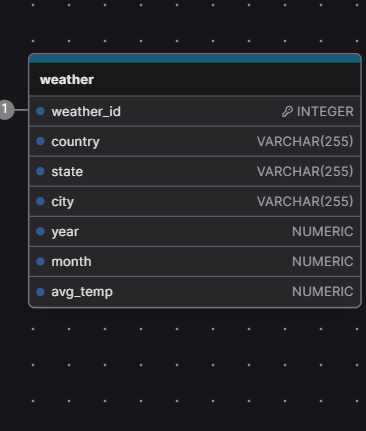

In [ ]:
# filer data by Country == US
weather_df = temp_df.loc[temp_df["Country"] == "US"]
# remove region column
weather_df = weather_df.drop(columns=["Region"])
weather_df.head()

,Country,State,City,Month,Day,Year,AvgTemperature
1450990,US,Alabama,Birmingham,1,1,1995,50.7
1450991,US,Alabama,Birmingham,1,2,1995,37.2
1450992,US,Alabama,Birmingham,1,3,1995,33.2
1450993,US,Alabama,Birmingham,1,4,1995,33.3
1450994,US,Alabama,Birmingham,1,5,1995,26.4


In [ ]:
# accumulate data to monthly level (find avg temp that month that year in each city and state )
weather_df = weather_df.groupby(['Year', 'Month', 'Country', 'City', 'State'])['AvgTemperature'].mean().reset_index()
weather_df.head()

,Year,Month,Country,City,State,AvgTemperature
0,1995,1,US,Abilene,Texas,45.503226
1,1995,1,US,Akron Canton,Ohio,28.477419
2,1995,1,US,Albany,New York,31.622581
3,1995,1,US,Albuquerque,New Mexico,38.309677
4,1995,1,US,Allentown,Pennsylvania,34.329032


In [ ]:
# round AvgTemperature to 2 decimal places
weather_df['AvgTemperature'] = weather_df['AvgTemperature'].round(2)
weather_df.head()

,Year,Month,Country,City,State,AvgTemperature
0,1995,1,US,Abilene,Texas,45.50
1,1995,1,US,Akron Canton,Ohio,28.48
2,1995,1,US,Albany,New York,31.62
3,1995,1,US,Albuquerque,New Mexico,38.31
4,1995,1,US,Allentown,Pennsylvania,34.33


In [ ]:
# Save that as a csv file
weather_df.to_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /weather.csv', index=False)

## Prep games table data

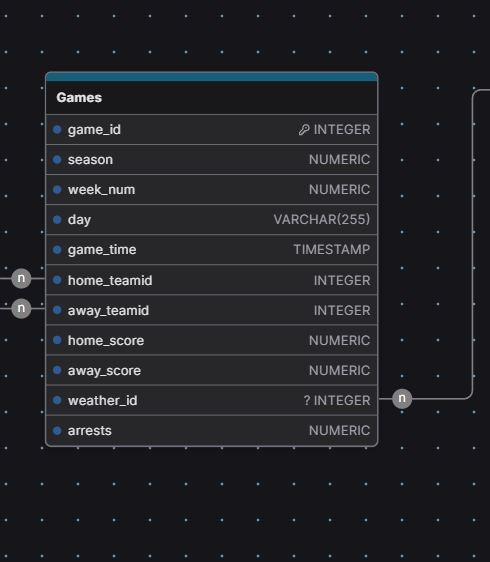

In [ ]:
# view arrests df
arrests_df.head()

,Year,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,Month,date,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,9,2011-09,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,9,2011-09,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,10,2011-10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,11,2011-11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,12,2011-12,Arizona,Phoenix


In [ ]:
# create games_df with arrests_df Year, week_num, day_of_week, gametime, hometeam, away,team home score away score arrests, division, and month
games_df = arrests_df[['Year', 'week_num', 'day_of_week', 'gametime_local', 'home_team', 'away_team', 'home_score', 'away_score', 'arrests', 'division_game', 'Month', 'State', 'City']]
games_df

,Year,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,Month,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,5.0,n,9,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,6.0,n,9,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,9.0,n,10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,6.0,y,11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,3.0,n,12,Arizona,Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,2.0,n,10,District of Columbia,Washington DC
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,2.0,n,11,District of Columbia,Washington DC
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,2.0,y,11,District of Columbia,Washington DC
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,4.0,y,12,District of Columbia,Washington DC


In [ ]:
# replace home teams with names from team_names dic
games_df['home_team'] = games_df['home_team'].replace(nfl_teams)
# replace away teams with names from team_names dic
games_df['away_team'] = games_df['away_team'].replace(nfl_teams)
games_df

<ipython-input-161-c541e9d5925e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['home_team'] = games_df['home_team'].replace(nfl_teams)
<ipython-input-161-c541e9d5925e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['away_team'] = games_df['away_team'].replace(nfl_teams)


,Year,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,arrests,division_game,Month,State,City
0,2011,1,Sunday,1:15:00 PM,Arizona Cardinals,Carolina Panthers,28,21,5.0,n,9,Arizona,Phoenix
1,2011,4,Sunday,1:05:00 PM,Arizona Cardinals,New York Giants,27,31,6.0,n,9,Arizona,Phoenix
2,2011,7,Sunday,1:05:00 PM,Arizona Cardinals,Pittsburgh Steelers,20,32,9.0,n,10,Arizona,Phoenix
3,2011,9,Sunday,2:15:00 PM,Arizona Cardinals,Los Angeles Rams,19,13,6.0,y,11,Arizona,Phoenix
4,2011,13,Sunday,2:15:00 PM,Arizona Cardinals,Dallas Cowboys,19,13,3.0,n,12,Arizona,Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington Commanders,Tampa Bay Buccaneers,31,30,2.0,n,10,District of Columbia,Washington DC
1002,2015,10,Sunday,1:00:00 PM,Washington Commanders,New Orleans Saints,47,14,2.0,n,11,District of Columbia,Washington DC
1003,2015,12,Sunday,1:00:00 PM,Washington Commanders,New York Giants,20,14,2.0,y,11,District of Columbia,Washington DC
1004,2015,13,Monday,8:30:00 PM,Washington Commanders,Dallas Cowboys,16,19,4.0,y,12,District of Columbia,Washington DC


In [ ]:
# save games as csv
games_df.to_csv('/content/drive/MyDrive/Database Management /Group Project Dashboard/Data /games.csv', index=False)

In [ ]:
# open weather csv
weather_df = pd.read_csv('/content/Weather_202412011947.csv')
weather_df

,weather_id,Country,State,City,Year,Month,AvgTemperature
0,1,US,Texas,Abilene,"1,995",1,45.50
1,2,US,Ohio,Akron Canton,"1,995",1,28.48
2,3,US,New York,Albany,"1,995",1,31.62
3,4,US,New Mexico,Albuquerque,"1,995",1,38.31
4,5,US,Pennsylvania,Allentown,"1,995",1,34.33
...,...,...,...,...,...,...,...
47293,47294,US,Kansas,Wichita,"2,020",5,59.25
47294,47295,US,Texas,Wichita Falls,"2,020",5,70.29
47295,47296,US,Pennsylvania,Wilkes Barre,"2,020",5,49.88
47296,47297,US,Washington,Yakima,"2,020",5,58.78
